# Group S

## Group Members

## 1. Safial Islam Ayon 
## 2. Md Shohel Mojumder
## 3. Arber Aga
## 4. Imtiaz Ahmed 

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from pylab import * 
%matplotlib inline 

## Problem 1 - i

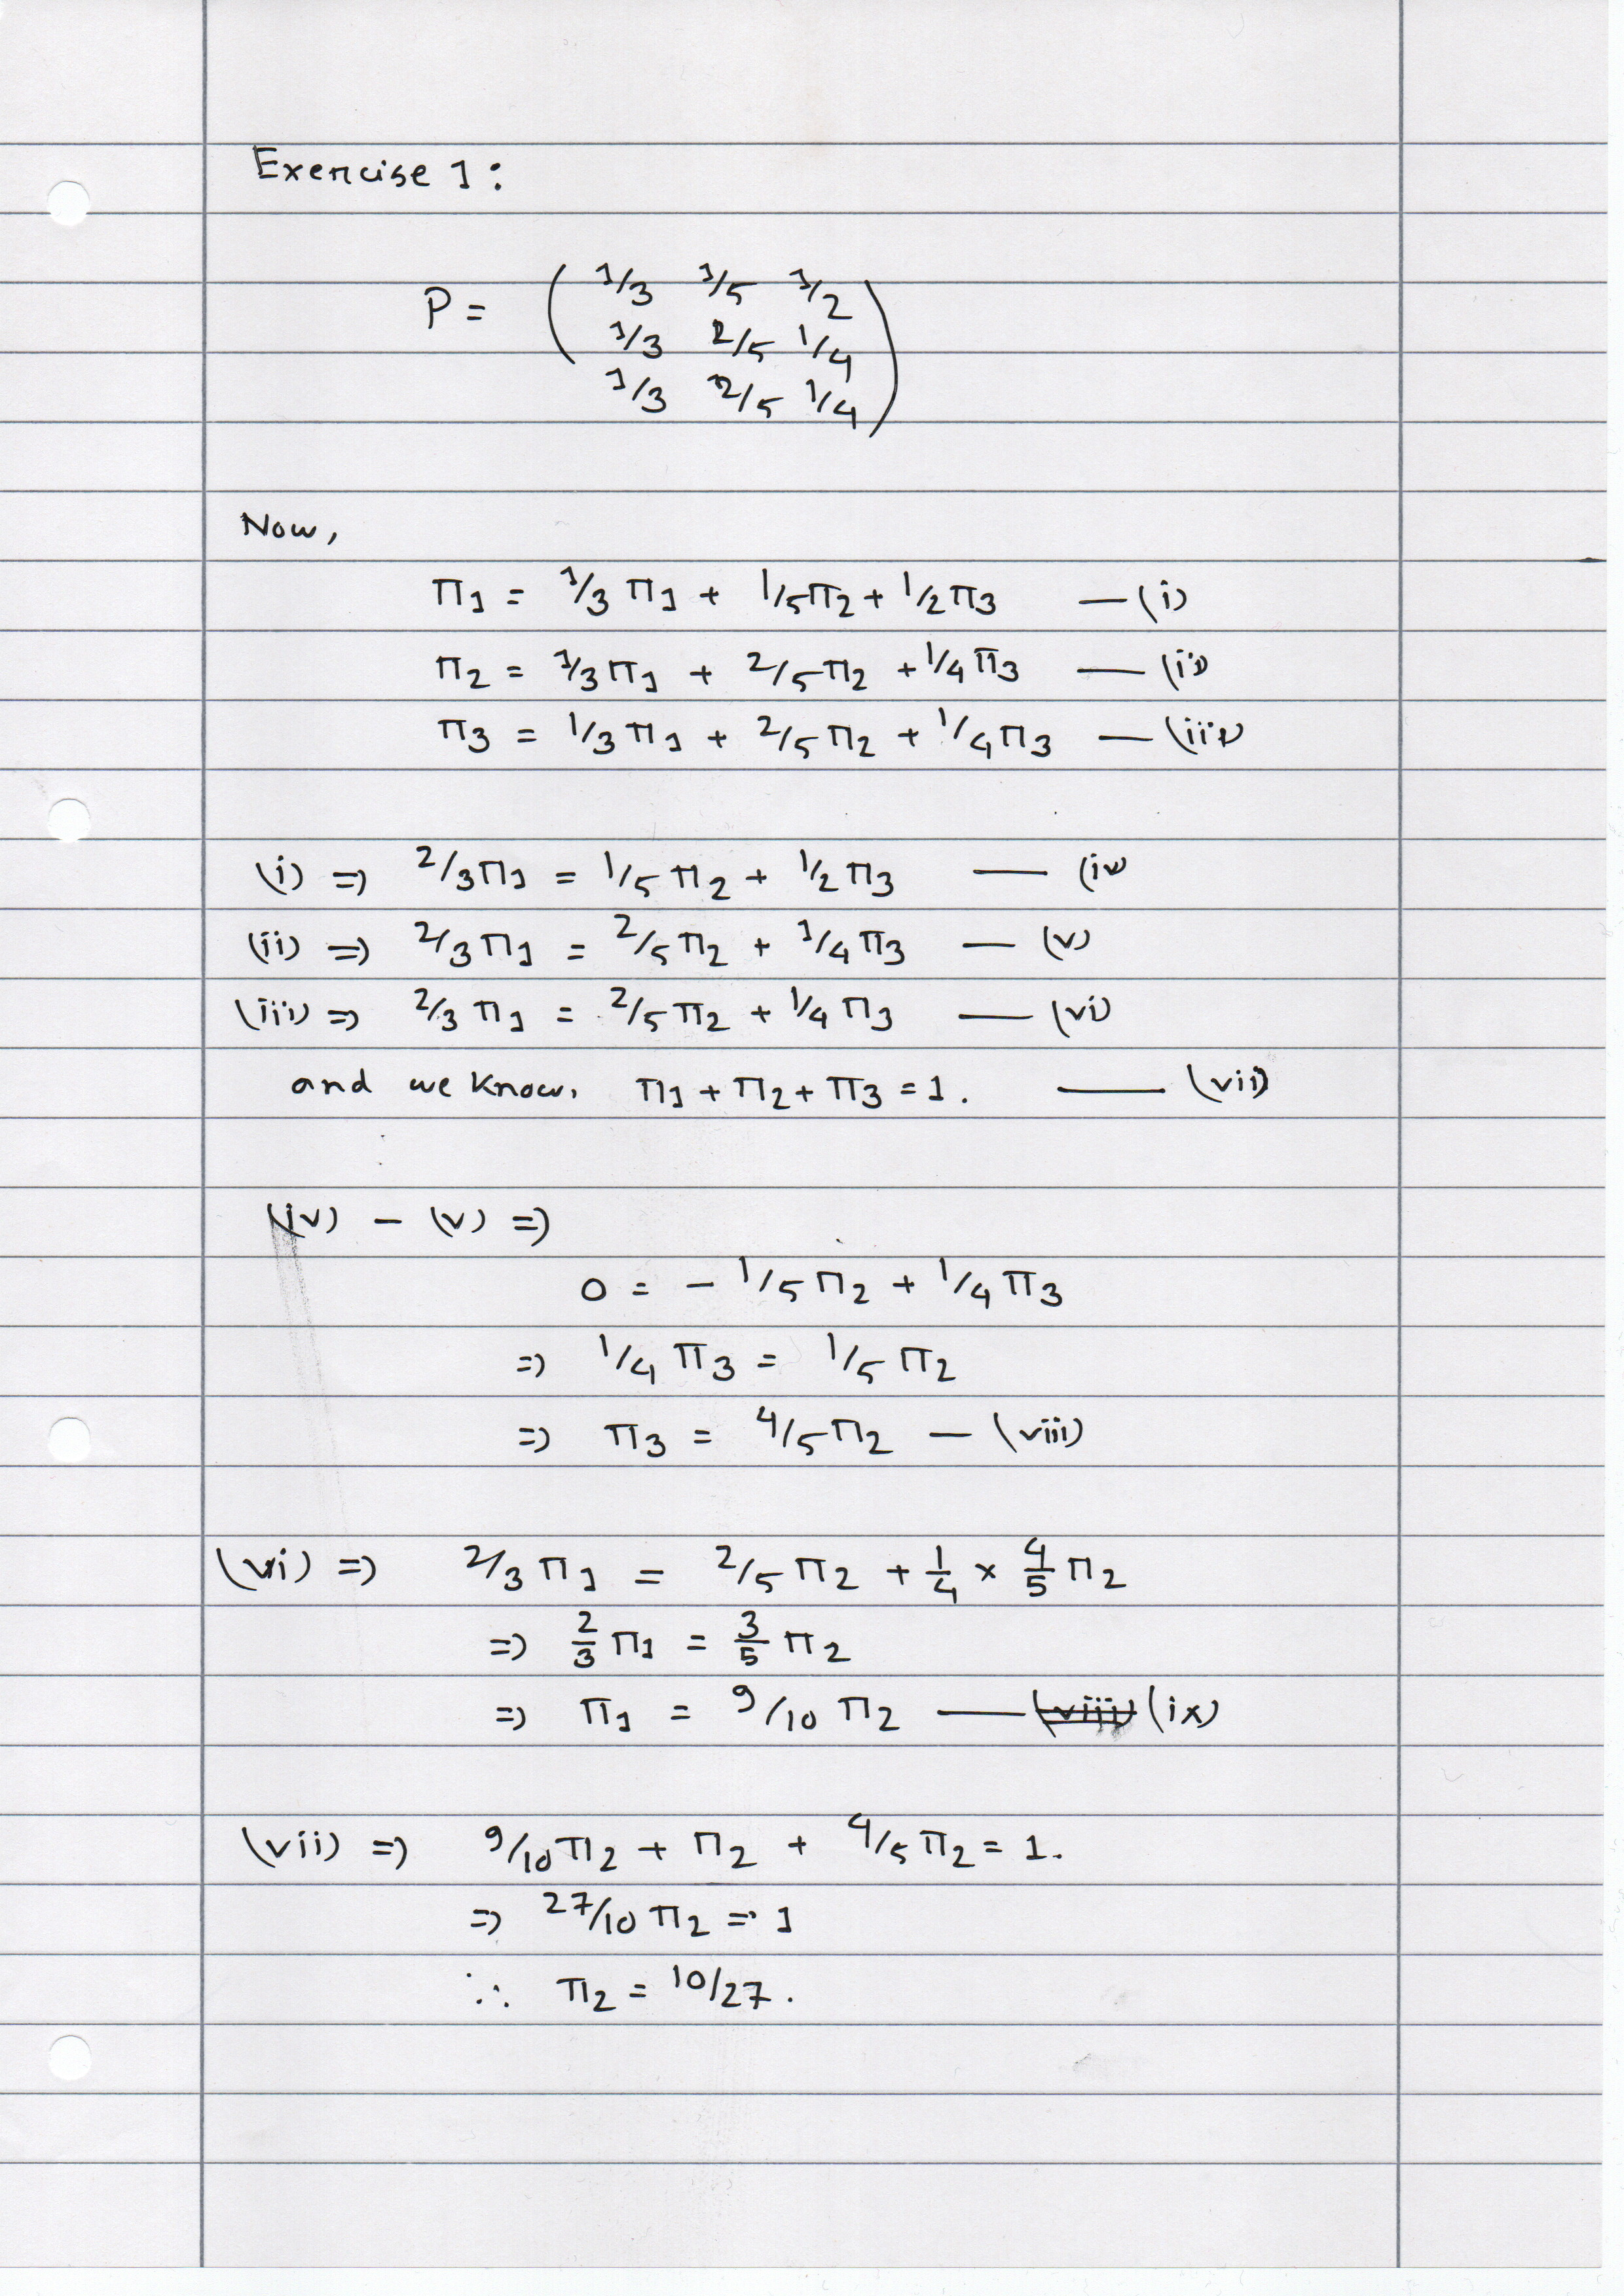

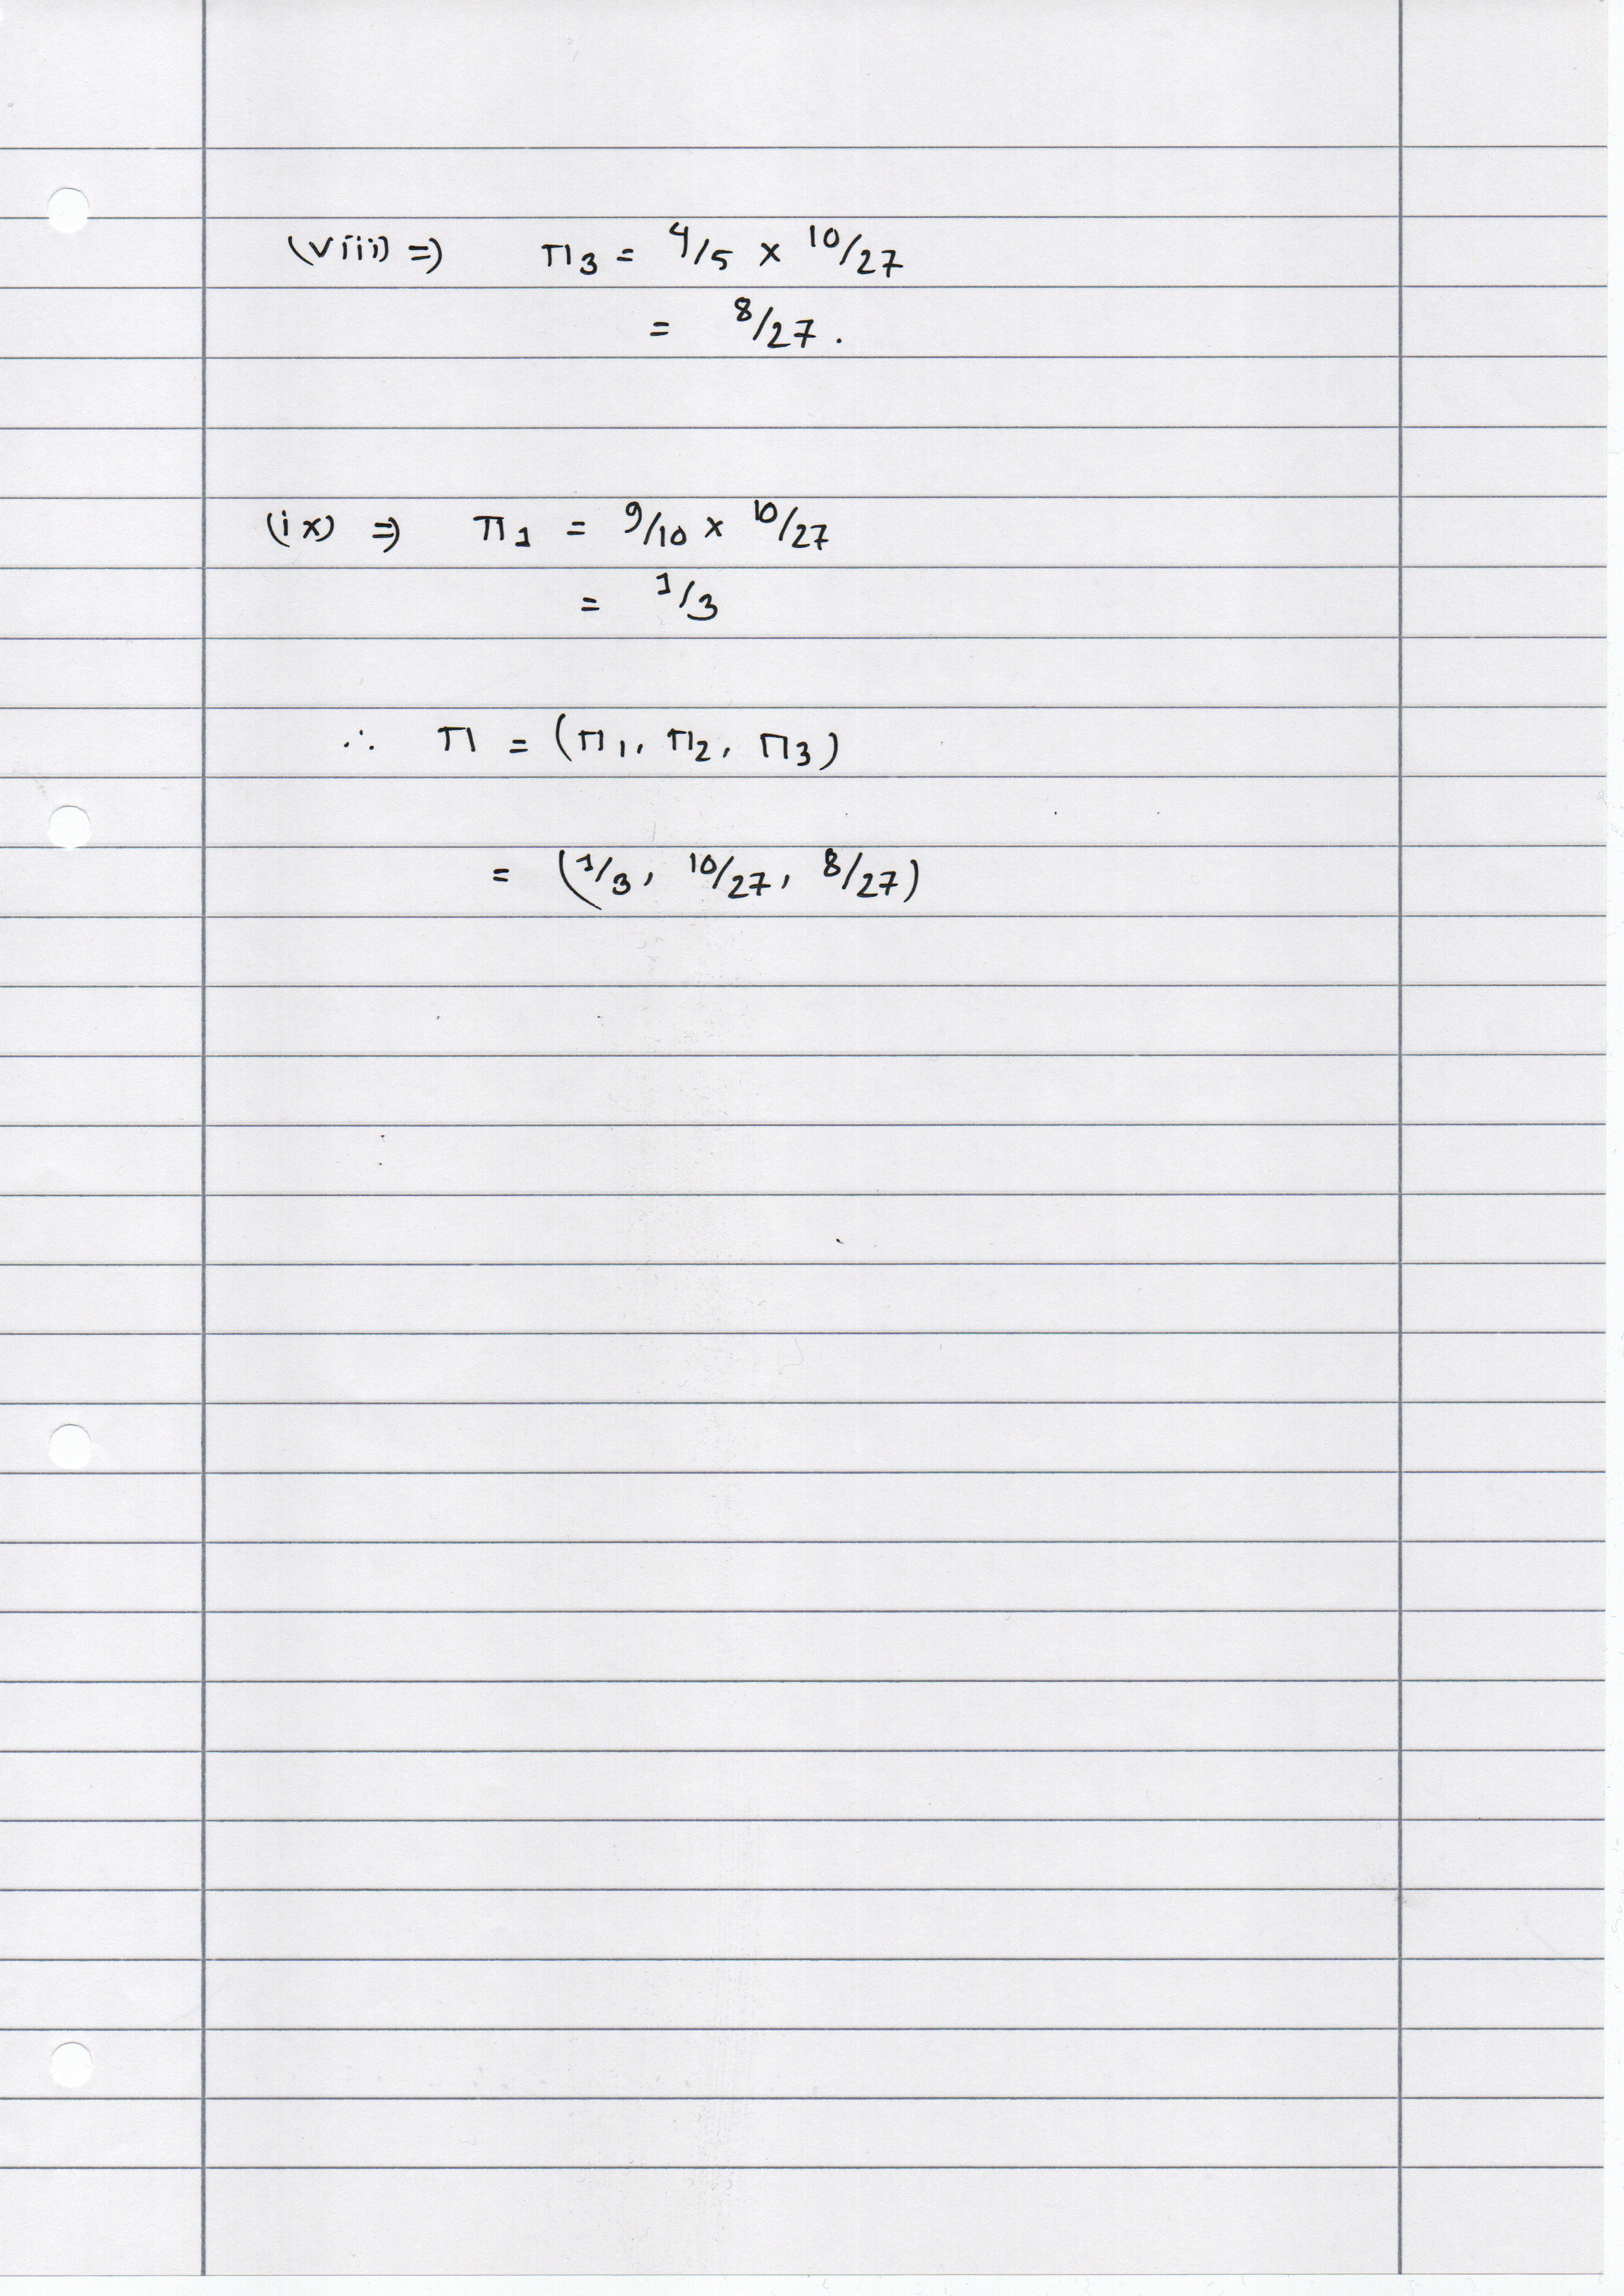

In [6]:
tm = array([[1/3, 1/5, 1/2], [1/3, 2/5, 1/4], [1/3, 2/5, 1/4]])

state = np.array([[1/3, 10/27, 8/27]]) #from above
stateHist = state
dfStateHist = pd.DataFrame(state)
distr_hist = [[0, 0, 0]]

for x in range(10):
    state = np.dot(state, tm)
    stateHist = np.append(stateHist, state, axis=0)
    dfDistrHist = pd.DataFrame(stateHist)

print(dfDistrHist)

           0         1         2
0   0.333333  0.370370  0.296296
1   0.333333  0.333333  0.333333
2   0.333333  0.333333  0.333333
3   0.333333  0.333333  0.333333
4   0.333333  0.333333  0.333333
5   0.333333  0.333333  0.333333
6   0.333333  0.333333  0.333333
7   0.333333  0.333333  0.333333
8   0.333333  0.333333  0.333333
9   0.333333  0.333333  0.333333
10  0.333333  0.333333  0.333333


As the value is fixed so the chain converge to its invariant measure

## Problem 1 - ii

In [12]:
#tm (numpy.ndarray): A transition matrix.
#k (int): The number of steps.
#s0 (int): A starting state.
            
def sample(tm, k, s0):
    n = np.size(tm, 0)
    all_states = np.arange(n)
    
    curr_state = s0
    sequence = []
    sequence.append(curr_state)
    
    for i in range(k):
        # (1 for the current state and 0 for the rest).
        curr_states = np.zeros(n)
        curr_states[curr_state] = 1
        
        # Uses the transition matrix to determine the distibution for the next step.
        curr_states = tm @ curr_states
        
        # Randomly choose a state for the next step.
        next_state = np.random.choice(all_states, 1, p = curr_states)
        curr_state = next_state[0]
        sequence.append(curr_state)
        
    return sequence

Path:  [0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1]


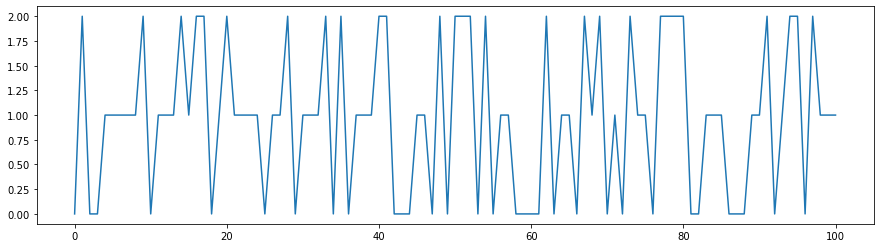

In [13]:
states = sample(tm, k = 100, s0 = 0)
print("Path: ", states)
plt.figure(figsize=(15, 4))
plt.plot(states)

## Problem 1 - iii

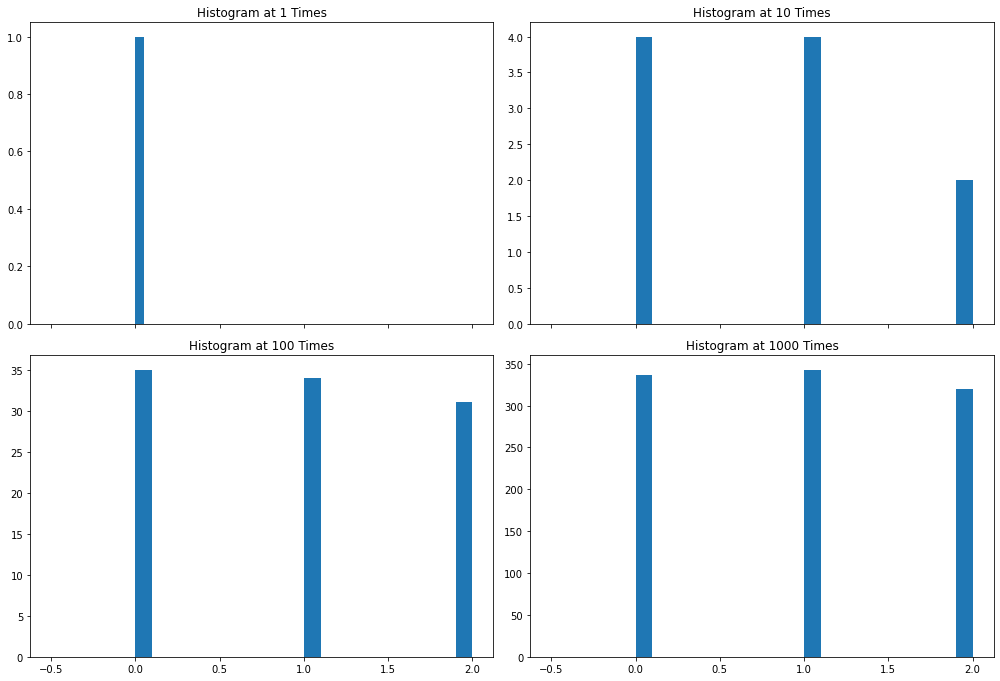

In [14]:
# Plots a histogram of final states across 1000 trajectories.
tm = array([[1/3, 1/5, 1/2], [1/3, 2/5, 1/4], [1/3, 2/5, 1/4]])
final_states = []
for i in range(1000):
    states = sample(tm, k = 1000, s0 = 0)
    final_states.append(states[1000])
    
fig, axes = plt.subplots(2, 2, sharex=True, figsize=[14, 10]) 

initial_state = np.zeros(3)
initial_state[0] = 1
all_states = np.arange(3)

for i, sample_count in enumerate([1, 10, 100, 1000]):
    samples_subset = final_states[:sample_count]
    ax = axes[i // 2, i % 2]
    ax.hist(samples_subset, bins=20)
    ax.set_title("Histogram at %d Times" % sample_count)

fig.tight_layout()
fig.subplots_adjust(top=0.92)

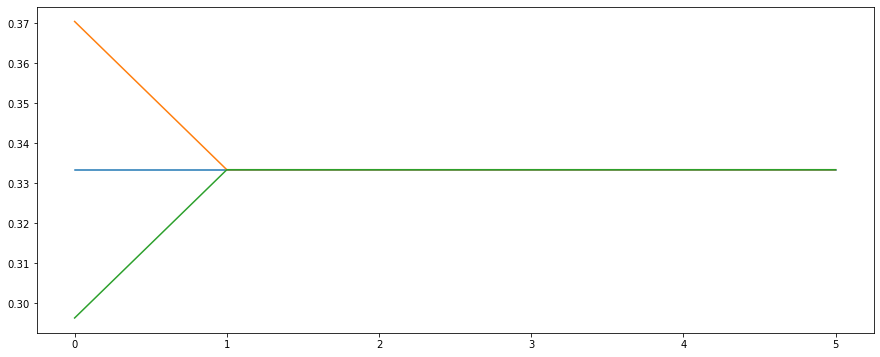

In [15]:
plt.figure(figsize=(15, 6))

state = np.array([[1/3, 10/27, 8/27]])
stateHist = state
dfStateHist = pd.DataFrame(state)
distr_hist = [[0, 0, 0]]

for x in range(5):
    state = np.dot(state, tm)
    stateHist = np.append(stateHist, state, axis=0)
    dfDistrHist = pd.DataFrame(stateHist)

plt.plot(dfDistrHist)
plt.show()

## Problem 1 - iv

In [36]:
def sample_discrete_distribution(p, n):
    unif = np.random.uniform(size=n) 
    
    cumulative = np.cumsum(p) # calculate the CDF
    
    samples = np.array([np.nan]*n) # initialize an array for the samples from the distribution p
    
    for i,prob in enumerate(np.flip(cumulative)):
        samples[unif<=prob] = len(p)-i
    
    return(samples)

In [37]:
def metropolis_sampling(target, size):
    state = 1
    p = [1/3, 1/3, 1/3]
    samples = []
    
    for i in range(size+100): 
        Y_state = int(sample_discrete_distribution(p,1)[0]) 
        r_ij = target[Y_state-1]/target[state-1] 
        a = np.min([1., r_ij])
        if( np.random.uniform() < a): 
            state = Y_state
            
        samples.append(state)
    
    return(np.array(samples[100:]))

In [38]:
pi = [1/2, 1/4, 1/4]

samples_pi = metropolis_sampling(pi, 100)

Path:  [1 2 2 1 1 1 3 2 1 2 3 3 3 3 2 1 2 2 1 1 1 2 2 3 1 2 3 3 3 2 2 2 1 3 3 2 3
 2 1 2 3 3 3 3 2 2 2 2 3 1 1 2 2 1 3 1 1 1 1 3 1 3 3 2 3 3 2 3 1 2 1 3 2 3
 2 1 3 2 3 3 3 1 1 3 1 2 3 3 1 3 3 2 2 2 1 1 1 1 1 1]


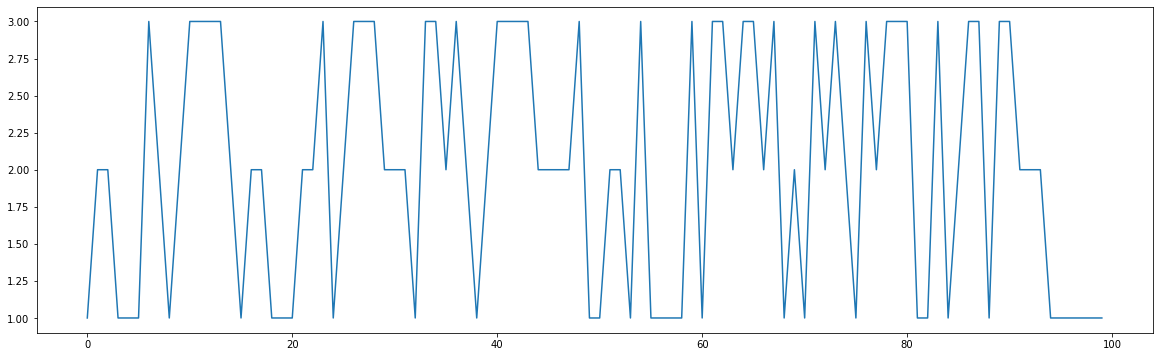

In [39]:
print("Path: ", samples_pi)
plt.figure(figsize=(20, 6))
plt.plot(samples_pi)

## Problem 1 - iv

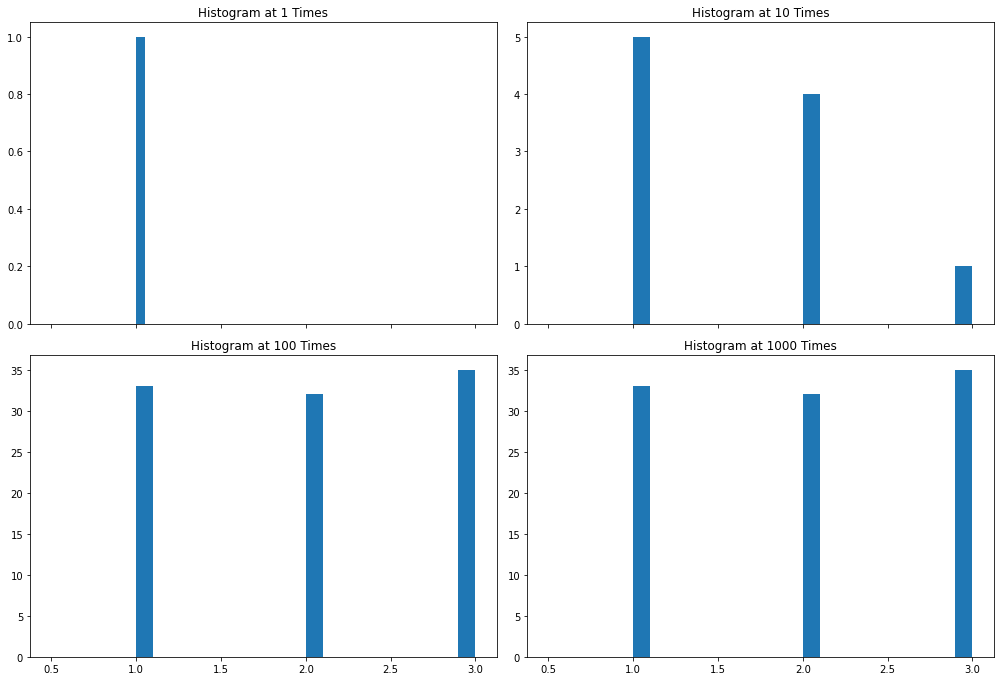

In [40]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=[14, 10]) 

initial_state = np.zeros(3)
initial_state[0] = 1
all_states = np.arange(3)

for i, sample_count in enumerate([1, 10, 100, 1000]):
    samples_subset = samples_pi[:sample_count]
    ax = axes[i // 2, i % 2]
    ax.hist(samples_subset, bins=20)
    ax.set_title("Histogram at %d Times" % sample_count)

fig.tight_layout()
fig.subplots_adjust(top=0.92) 

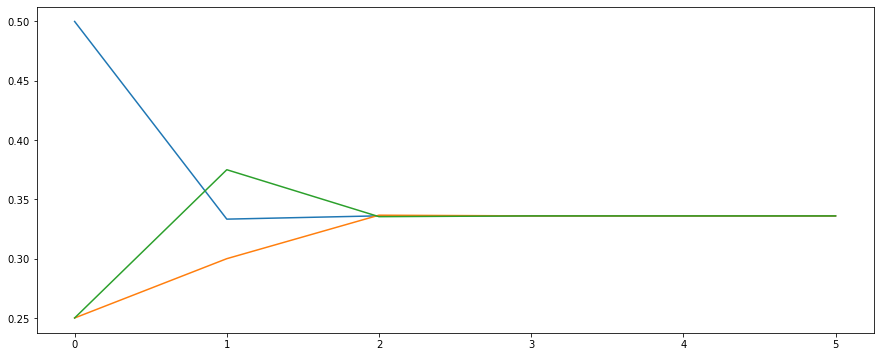

In [41]:
plt.figure(figsize=(15, 6))

state = np.array([[1/2, 1/4, 1/4]])
stateHist = state
dfStateHist = pd.DataFrame(state)
distr_hist = [[0, 0, 0]]

for x in range(5):
    state = np.dot(state, tm)
    stateHist = np.append(stateHist, state, axis=0)
    dfDistrHist = pd.DataFrame(stateHist)

plt.plot(dfDistrHist)
plt.show()